[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ferit-osirv/lab6/blob/main/lab6.ipynb)


## Lab 6: Feature Detection and Image Retrieval

**This command must be run before starting to do each lab.**

In [102]:
!rm -rf clone && git clone https://github.com/ferit-osirv/lab6 clone && cp -a clone/. .

Cloning into 'clone'...
remote: Enumerating objects: 155, done.
remote: Total 155 (delta 0), reused 0 (delta 0), pack-reused 155 (from 2)
Receiving objects: 100% (155/155), 45.04 MiB | 42.27 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In this lab, you will develop an image retrieval algorithm. Image retrieval involves finding images within a large dataset that match a given query image. For example, if the query image features the Eiffel Tower, the image retrieval algorithm should identify and retrieve all images containing the Eiffel Tower.

**Note:** Depending on your group ID, you will later be assigned a specific landmark to track.

## Resources

Most of the resources required for this assignment can be found in this guide:

[OpenCV Documentation: Feature Detection and Description](https://docs.opencv.org/4.x/db/d27/tutorial_py_table_of_contents_feature2d.html)

**Please read through all sections**. The last two sections will be essential for implementing this assignment.

## Image Retrieval Algorithm

The algorithm will operate as follows:

**Step 1:** Detect features in the query image using **ORB**. Detect features in the search image using **ORB**. You now have a set of features for both images.

**Step 2:** Match the features of the query image to the features of the search image using **FLANN (Fast Approximate Nearest Neighbor Search Library)** with Lowe's ratio test. Thus, matches with a low score will be removed. You now have a set of similar feature matches between the query and search image.

**Step 2:** If there are more than a certain number of matches (e.g. 5) between a query and a search image, we can conclude that the search image contains the landmark. This result is stored as either true or false.

**Algorithm in Pseudocode**

Input: A list of query images featuring a specific landmark, a list of images for searching, some of which contain the landmark and some that do not, and a threshold value (e.g., 10) for the number of matches required to confirm the presence of the landmark in an image.

```python
image_contains_landmark = []
for each image with index i:
  image_contains_landmark[i] = false

for each query image:
  for each image with index i:
    matches = match_features(query, image)
    if matches count > threshold:
      image_contains_landmark[i] = true
```

**Feature Matching**

The feature matching process should proceed in several steps (as explained in the "Feature Matching" section referenced above):

**Step 1:** Conduct feature detection on the query image using **ORB**.

**Step 2:** Perform feature detection on the search image using **ORB**.

**Step 3:** Use **FLANN (Fast Approximate Nearest Neighbor Search Library)** with Lowe's ratio test to match the features of the query and search image.

**Step 4:** Implement **Lowe's ratio test** to retain only features below a certain distance threshold.

**Step 5:** Return the matches that are above the distance threshold.

## Dataset API

The code block below includes helper functions for working with the following dataset:

https://github.com/filipradenovic/revisitop (rparis6k)
published in: Radenović, F., Iscen, A., Tolias, G., Avrithis, Y., & Chum, O. (2018). Revisiting Oxford and Paris: Large-Scale Image Retrieval Benchmarking. 2018 IEEE/CVF Conference on Computer Vision and Pattern Recognition, 5706-5715.

The dataset contains thousands of images of various landmarks in Paris, France. It also contains query images for each landmark, and labels of which landmark is on each image.

**⚠️ Click the ▶️ button to run the cell below.**

In [103]:
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import shutil
import os.path as p

def get_query_img(landmark):
  fname = p.join('images', 'query', landmark + '.jpg')
  img = cv.imread(fname)
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  return img

def get_imgs(landmark):
  imgs = []
  folder = p.join('images', landmark)
  for fname in os.listdir(folder):
    if fname.split('.')[-1] != 'jpg':
      continue
    img = cv.imread(p.join(folder, fname))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    imgs.append(img)
  return imgs

def get_img_fnames(landmark):
  fnames = []
  folder = p.join('images', landmark)
  for fname in os.listdir(folder):
    if fname.split('.')[-1] != 'jpg':
      continue
    fnames.append(p.join(folder, fname))
  return fnames

landmarks = ['eiffel', 'louvre', 'defense', 'moulinrouge', 'invalides']

all_img_fnames = []
for landmark in landmarks:
  all_img_fnames += get_img_fnames(landmark)

num_imgs = len(all_img_fnames)

def get_img_fname(i):
  return all_img_fnames[i]

def get_img(i):
  img = cv.imread(get_img_fname(i))
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  return img

## Groups

Your group number corresponds to the first letter of your first name. **⚠️ Enter your first name below and run the block get your landmark and method.**

In [104]:
# @title  { run: "auto", vertical-output: true }

first_name = "Samuel" # @param {type:"string"}

first_letter = first_name[0].lower()
group_id = 0
if first_letter in 'abcćčdđe':
  group_id = 1
elif first_letter in 'fghij':
  group_id = 2
elif first_letter in 'klmno':
  group_id = 3
elif first_letter in 'pqrsšt':
  group_id = 4
else:
  group_id = 5

assert len(str(group_id)) == 1, "Incorrect group"

landmarks = ['defense', 'louvre', 'moulinrouge', 'invalides', 'eiffel']

assert (group_id - 1) >= 0 and (group_id - 1) < len(landmarks), "Incorrect group"

landmark = landmarks[group_id - 1]
print("Your landmark:", landmark)

Your landmark: invalides


## Documentation

**Available predefined functions in this notebook**:


 - `get_query_imgs(landmark)` - load a list of query images
   - `landmark` can be `'defense', 'louvre', 'moulinrouge', 'invalides', 'eiffel'`.
 - `get_img(i)` - load the `i`th image from the dataset
 - `get_img_fname(i)` - returns the file name of the image
 - `num_imgs` - the total number of images in the dataset
 - `get_imgs(landmark)` - get all images of a certain landmark, useful for evaluation
 - `get_img_fnames(landmark)` - get all image filenames of a certain landmark, useful for evaluation

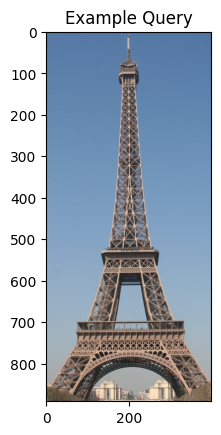

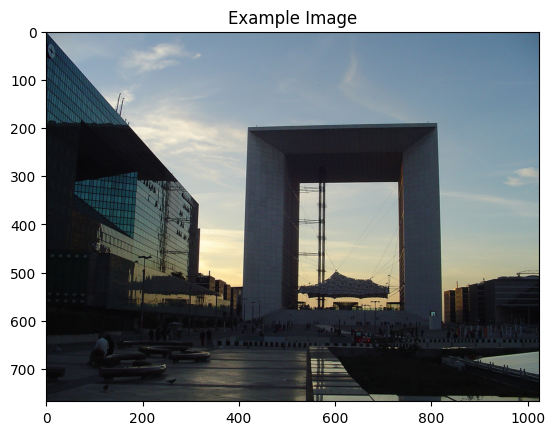

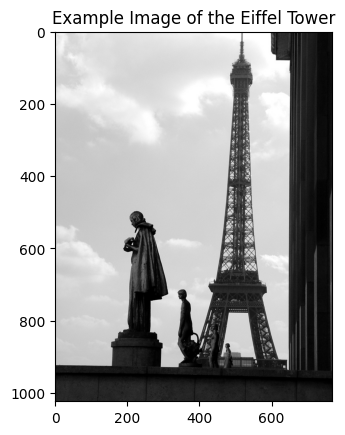

Image 40 images/defense/paris_defense_000060.jpg
All Eiffel images ['images/eiffel/paris_eiffel_000021.jpg', 'images/eiffel/paris_eiffel_000051.jpg', 'images/eiffel/paris_eiffel_000005.jpg', 'images/eiffel/paris_eiffel_000174.jpg', 'images/eiffel/paris_eiffel_000146.jpg', 'images/eiffel/paris_eiffel_000000.jpg', 'images/eiffel/paris_eiffel_000177.jpg', 'images/eiffel/paris_eiffel_000176.jpg', 'images/eiffel/paris_eiffel_000086.jpg', 'images/eiffel/paris_eiffel_000098.jpg', 'images/eiffel/paris_eiffel_000012.jpg', 'images/eiffel/paris_eiffel_000128.jpg', 'images/eiffel/paris_eiffel_000266.jpg', 'images/eiffel/paris_eiffel_000327.jpg']


In [105]:
# Some example code

query_img = get_query_img('eiffel')
plt.imshow(query_img)
plt.title('Example Query');
plt.show()

example_img = get_img(40)
plt.imshow(example_img)
plt.title('Example Image');
plt.show()

example_eiffel_img = get_imgs('eiffel')[5]
plt.imshow(example_eiffel_img)
plt.title('Example Image of the Eiffel Tower');
plt.show()

print('Image 40', get_img_fname(40))
print('All Eiffel images', get_img_fnames('eiffel'))

## Assignment

In [106]:
print(landmark)

invalides


## Initial Algorithm Development

For algorithm development, it is faster to only go through known images of that landmark.

Later in the notebook, you will perform the search across all images.

Before you start development here, it might be a good idea to first try implementing feature matching for just one query and one search image. You can then convert that code to a for loop to go through multiple images as in the block below.

In [107]:
# TODO: Implement ORB by detecting keypoints and computing descriptors
#      for the query and the search image. Match the descriptors
#      using a FLANN-based matcher. Use cv.drawMatchesKnn to
#      visualize the matches. You can use the provided materials as a reference.

query_img = get_query_img(landmark)
search_img = get_imgs(landmark)[0]

# Note: Detect the features on grayscale images.



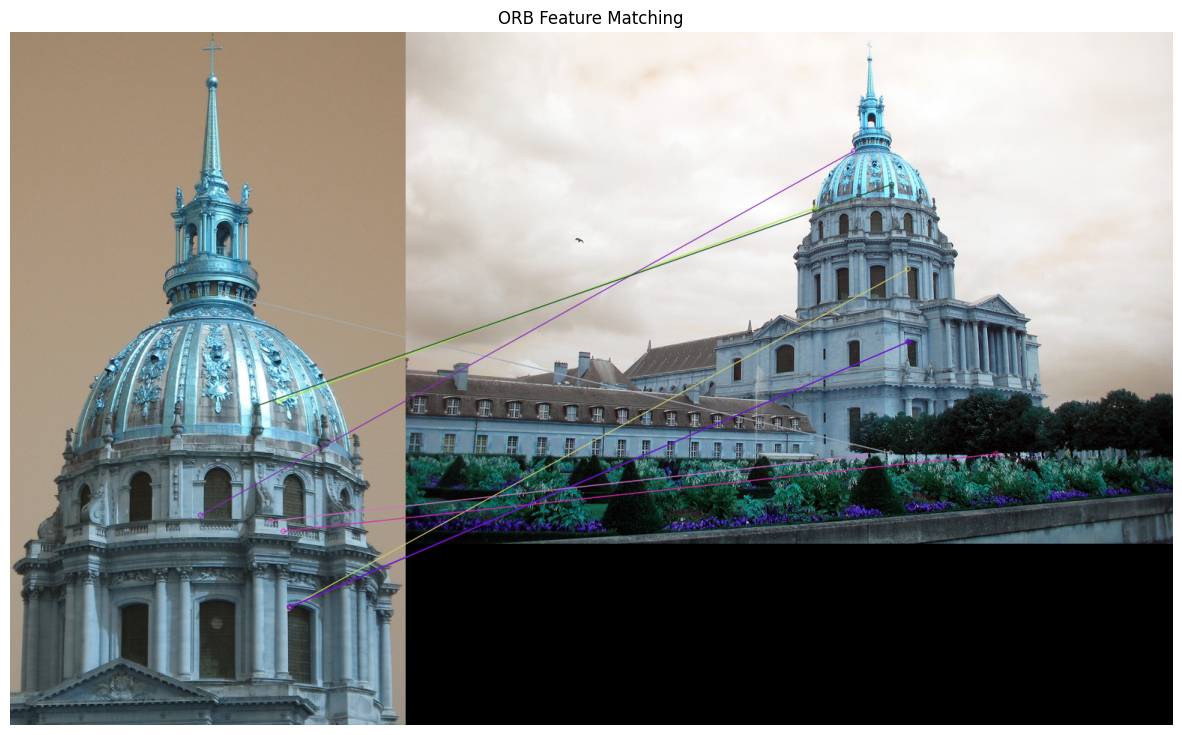

In [108]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to implement ORB feature detection and matching
def orb_feature_matching(query_img, search_img):
    # Convert images to grayscale
    query_gray = cv2.cvtColor(query_img, cv2.COLOR_BGR2GRAY)
    search_gray = cv2.cvtColor(search_img, cv2.COLOR_BGR2GRAY)

    # Initialize the ORB detector
    orb = cv2.ORB_create()

    # Detect keypoints and compute descriptors
    query_keypoints, query_descriptors = orb.detectAndCompute(query_gray, None)
    search_keypoints, search_descriptors = orb.detectAndCompute(search_gray, None)

    # Check if descriptors are found
    if query_descriptors is None or search_descriptors is None:
        print("No descriptors found in one of the images!")
        return None

    # FLANN-based matcher parameters
    index_params = dict(algorithm=6,  # FLANN_INDEX_LSH
                        table_number=6,  # 12 is good for SIFT
                        key_size=12,     # 20 is good for SIFT
                        multi_probe_level=1)  # 2 is good for SIFT
    search_params = dict(checks=50)

    # Create the FLANN-based matcher
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    # Match descriptors using KNN
    matches = flann.knnMatch(query_descriptors, search_descriptors, k=2)

    # Apply ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append([m])

    # Draw matches using cv.drawMatchesKnn
    matched_img = cv2.drawMatchesKnn(query_img, query_keypoints,
                                     search_img, search_keypoints,
                                     good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Show the matches
    plt.figure(figsize=(15, 10))
    plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
    plt.title("ORB Feature Matching")
    plt.axis("off")
    plt.show()

    return matched_img

# Example usage with your images
query_img = get_query_img(landmark)
search_img = get_imgs(landmark)[0]

# Ensure images are loaded correctly
if query_img is not None and search_img is not None:
    orb_feature_matching(query_img, search_img)
else:
    print("Error loading images!")


Next, we can compute the features across all images and store them in a list.

In [110]:
"""# For this initial phase, we will only go through known landmarks.
# Later in this notebook, we will go through every image in the dataset.
known_landmark_fnames = get_img_fnames(landmark)
known_landmark_imgs = get_imgs(landmark)
query_img = get_query_img(landmark)

query_features = # TODO: Detect features on the query image
detected_features = []
for img in known_landmark_imgs:
  # TODO
  # detect keypoints and descriptors
  # keypoints, descriptors = ...
  # detected_features.append((keypoints, descriptors))
  """

'# For this initial phase, we will only go through known landmarks.\n# Later in this notebook, we will go through every image in the dataset.\nknown_landmark_fnames = get_img_fnames(landmark)\nknown_landmark_imgs = get_imgs(landmark)\nquery_img = get_query_img(landmark)\n\nquery_features = # TODO: Detect features on the query image\ndetected_features = []\nfor img in known_landmark_imgs:\n  # TODO\n  # detect keypoints and descriptors\n  # keypoints, descriptors = ...\n  # detected_features.append((keypoints, descriptors))\n  '

In [111]:
known_landmark_fnames = get_img_fnames(landmark)
known_landmark_imgs = get_imgs(landmark)
query_img = get_query_img(landmark)
# Function to detect features and compute descriptors using ORB
def detect_features(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Initialize the ORB detector
    orb = cv2.ORB_create()

    # Detect keypoints and compute descriptors
    keypoints, descriptors = orb.detectAndCompute(gray_image, None)
    return keypoints, descriptors

# Detect features on the query image
query_keypoints, query_descriptors = detect_features(query_img)

# Store detected features for known landmark images
detected_features = []
for img in known_landmark_imgs:
    keypoints, descriptors = detect_features(img)
    detected_features.append((keypoints, descriptors))

# Debugging output to verify detection
print(f"Query Image: Detected {len(query_keypoints)} keypoints.")
for idx, (keypoints, descriptors) in enumerate(detected_features):
    print(f"Known Landmark Image {idx + 1}: Detected {len(keypoints)} keypoints.")


Query Image: Detected 500 keypoints.
Known Landmark Image 1: Detected 500 keypoints.
Known Landmark Image 2: Detected 500 keypoints.
Known Landmark Image 3: Detected 500 keypoints.
Known Landmark Image 4: Detected 500 keypoints.
Known Landmark Image 5: Detected 500 keypoints.
Known Landmark Image 6: Detected 500 keypoints.
Known Landmark Image 7: Detected 500 keypoints.
Known Landmark Image 8: Detected 500 keypoints.
Known Landmark Image 9: Detected 500 keypoints.
Known Landmark Image 10: Detected 500 keypoints.
Known Landmark Image 11: Detected 500 keypoints.
Known Landmark Image 12: Detected 500 keypoints.
Known Landmark Image 13: Detected 500 keypoints.
Known Landmark Image 14: Detected 500 keypoints.
Known Landmark Image 15: Detected 500 keypoints.
Known Landmark Image 16: Detected 500 keypoints.
Known Landmark Image 17: Detected 500 keypoints.
Known Landmark Image 18: Detected 500 keypoints.
Known Landmark Image 19: Detected 500 keypoints.
Known Landmark Image 20: Detected 500 key

Now that we have a feature for all image, we can go through them and try to match them using FLANN. Take a look at the introduction text and the references to understand how to do this.

In [112]:
"""
matched_fnames = []

for image_fname, features in zip(known_landmark_fnames, detected_features):
  keypoints, descriptors = features
  # TODO: Perform matching between the query image and the current image using FLANN and ratio test.
  # Note: You might get an error in the line ̨ `kp1, kp2 in matches` if there are no matches.
  # Instead, use `match in matches` and check if `len(matches) < 2`. If so, skip the image.
  # Note: Feel free to change the matches threshold to get better results (capture more matches).

  is_match = False
  if is_match:
    matched_fnames.append(image_fname)

print('Matched images:', len(matched_fnames))
print('Known matches:', len(known_landmark_fnames))
"""

"\nmatched_fnames = []\n\nfor image_fname, features in zip(known_landmark_fnames, detected_features):\n  keypoints, descriptors = features\n  # TODO: Perform matching between the query image and the current image using FLANN and ratio test.\n  # Note: You might get an error in the line ̨ `kp1, kp2 in matches` if there are no matches.\n  # Instead, use `match in matches` and check if `len(matches) < 2`. If so, skip the image.\n  # Note: Feel free to change the matches threshold to get better results (capture more matches).\n\n  is_match = False\n  if is_match:\n    matched_fnames.append(image_fname)\n\nprint('Matched images:', len(matched_fnames))\nprint('Known matches:', len(known_landmark_fnames))\n"

In [113]:
# Perform FLANN-based matching with a ratio test
def is_image_match(query_descriptors, target_descriptors, ratio_threshold=0.75):
    # Check if descriptors are valid
    if query_descriptors is None or target_descriptors is None:
        return False

    # Create FLANN matcher
    flann = create_flann_matcher()

    # Perform KNN matching
    matches = flann.knnMatch(query_descriptors, target_descriptors, k=2)

    # Apply the ratio test
    good_matches = []
    for match in matches:
        # Ensure there are at least two matches for the ratio test
        if len(match) < 2:
            continue
        m, n = match
        if m.distance < ratio_threshold * n.distance:
          good_matches.append(m)
          print(m.distance)
          print(n.distance)
          print(m.distance < ratio_threshold * n.distance)


    # Define a threshold for a match (adjustable based on dataset)
    return len(good_matches) > 10

# List to store filenames of matched images
matched_fnames = []

# Iterate through known landmark images and perform matching
for image_fname, features in zip(known_landmark_fnames, detected_features):
    keypoints, descriptors = features

    # Check if the image matches the query image
    is_match = is_image_match(query_descriptors, descriptors)

    # If it's a match, add the filename to the list
    if is_match:
        matched_fnames.append(image_fname)

# Output results
print('Matched images:', len(matched_fnames))
print('Known matches:', len(known_landmark_fnames))


53.0
71.0
True
66.0
93.0
True
61.0
83.0
True
66.0
99.0
True
49.0
74.0
True
35.0
69.0
True
37.0
50.0
True
66.0
91.0
True
37.0
54.0
True
56.0
78.0
True
52.0
81.0
True
71.0
100.0
True
65.0
92.0
True
59.0
82.0
True
54.0
75.0
True
66.0
102.0
True
61.0
85.0
True
57.0
78.0
True
41.0
55.0
True
56.0
77.0
True
57.0
80.0
True
59.0
84.0
True
72.0
98.0
True
57.0
79.0
True
54.0
80.0
True
46.0
66.0
True
38.0
66.0
True
55.0
78.0
True
43.0
60.0
True
36.0
60.0
True
37.0
71.0
True
80.0
109.0
True
38.0
60.0
True
64.0
92.0
True
60.0
82.0
True
68.0
93.0
True
64.0
90.0
True
56.0
82.0
True
47.0
65.0
True
56.0
76.0
True
58.0
82.0
True
47.0
63.0
True
55.0
76.0
True
56.0
76.0
True
72.0
97.0
True
53.0
73.0
True
49.0
70.0
True
55.0
82.0
True
59.0
83.0
True
52.0
71.0
True
54.0
88.0
True
38.0
53.0
True
54.0
74.0
True
52.0
82.0
True
59.0
81.0
True
63.0
88.0
True
68.0
96.0
True
51.0
73.0
True
60.0
89.0
True
59.0
96.0
True
47.0
67.0
True
74.0
103.0
True
32.0
50.0
True
60.0
89.0
True
50.0
72.0
True
65.0
90.0
True
66.0
9

#Now you have implemented the image matchign process for a limited subset of the data. Next, you will implement the same algorithm for all images in the dataset.

## Run the Algorithm on All Images

In [114]:
"""
# TODO: Implement the specified feature detection method for all images.

query_image = # TODO
query_features = # TODO
img_features = []

for i in range(num_imgs):
  img = get_img(i)
  img_fname = get_img_fname(i)
  # TODO
  # detect keypoints and descriptors as earlier

matched_fnames = []
# TODO: Perform matching between the query image and all images using FLANN

#my mark is invalides
"""

'\n# TODO: Implement the specified feature detection method for all images.\n\nquery_image = # TODO\nquery_features = # TODO\nimg_features = []\n\nfor i in range(num_imgs):\n  img = get_img(i)\n  img_fname = get_img_fname(i)\n  # TODO\n  # detect keypoints and descriptors as earlier\n\nmatched_fnames = []\n# TODO: Perform matching between the query image and all images using FLANN\n\n#my mark is invalides\n'

In [115]:
# For this initial phase, we will only go through known landmarks.
# Later in this notebook, we will go through every image in the dataset.
known_landmark_fnames = get_img_fnames(landmark)
known_landmark_imgs = get_imgs(landmark)
query_img = get_query_img(landmark)

orb = cv.ORB_create()  # Initialize ORB detector
query_keypoints, query_descriptors = orb.detectAndCompute(cv.cvtColor(query_img, cv.COLOR_RGB2GRAY), None)
query_features = (query_keypoints, query_descriptors)

detected_features = []
for img in known_landmark_imgs:
  # TODO
  # detect keypoints and descriptors
  # keypoints, descriptors = ...
  # detected_features.append((keypoints, descriptors))
  keypoints, descriptors = orb.detectAndCompute(cv.cvtColor(img, cv.COLOR_RGB2GRAY), None)
  detected_features.append((keypoints, descriptors)) # Append the results to detected_features

In [116]:
# TODO: Implement the specified feature detection method for all images.
# Get query image and features
query_image = get_query_img(landmark)
orb = cv.ORB_create()
query_keypoints, query_descriptors = orb.detectAndCompute(cv.cvtColor(query_image, cv.COLOR_RGB2GRAY), None)
query_features = (query_keypoints, query_descriptors)

img_features = []

for i in range(num_imgs):
  img = get_img(i)
  img_fname = get_img_fname(i)
  # TODO
  # detect keypoints and descriptors as earlier
  keypoints, descriptors = orb.detectAndCompute(cv.cvtColor(img, cv.COLOR_RGB2GRAY), None)
  img_features.append((keypoints, descriptors))


matched_fnames = []
# TODO: Perform matching between the query image and all images using FLANN
for i in range(num_imgs):
    features = img_features[i]
    keypoints, descriptors = features
    img_fname = get_img_fname(i)

    # Initialize FLANN matcher
    FLANN_INDEX_LSH = 6
    index_params = dict(algorithm=FLANN_INDEX_LSH, table_number=6, key_size=12, multi_probe_level=1)
    search_params = dict(checks=100)
    flann = cv.FlannBasedMatcher(index_params, search_params)

    # Match descriptors
    matches = flann.knnMatch(query_features[1], descriptors, k=2)

    # Apply ratio test and store good matches
    good_matches = []
    for match in matches:  # Iterate through matches, which might contain single elements
      # Check if the match has at least two elements before unpacking
      if len(match) >= 2: #Checks if the match has at least two elements
          m, n = match
          if m.distance < 0.7 * n.distance:
              good_matches.append(m)
    # Consider a match if there are enough good matches
    is_match = len(good_matches) >= 10

    if is_match:
        matched_fnames.append(img_fname)

Now that we have the results on the whole dataset, we can evaluate the performance of the algorithm.

## Evaluation

For evaluation, you will calculate values of the confusion matrix.

https://en.wikipedia.org/wiki/Confusion_matrix

True positives: Landmark is detected by your algorithm and is really a landmark; i.e. landmark is in both `matched_fnames` and `known_landmark_fnames`.

False positives: Landmark is matched by your algorithm but in reality the image does not contain the landmark; i.e. landmark is in `matched_fnames` but not in `known_landmark_fnames`.

In [117]:
def get_confusion_matrix(matched_fnames, known_landmark_fnames, num_imgs):
    '''
    matched_fnames: Your retrieval results from all images.
    known_landmark_fnames: Known GT landmark names.
    num_imgs: Total number of images in the dataset.
    '''
    # Convert to sets for easy operations
    matched_set = set(matched_fnames)
    known_set = set(known_landmark_fnames)

    # True Positives: In both matched and known sets
    tp = len(matched_set & known_set)

    # False Positives: In matched but not in known set
    fp = len(matched_set - known_set)

    # False Negatives: In known set but not in matched set
    fn = len(known_set - matched_set)

    # True Negatives: Everything else
    tn = num_imgs - (tp + fp + fn)

    return (tp, fp, tn, fn)

# Test if confusion matrix works correctly
matched_fnames_test = ['eiffel_0', 'eiffel_1', 'eiffel_2', 'louvre_0']
known_landmark_fnames_test = ['eiffel_0', 'eiffel_1', 'eiffel_2', 'eiffel_3']
num_imgs_test = 10

test_cm = (3, 1, num_imgs_test - (3 + 1 + 1), 1)  # (TP, FP, TN, FN)

# Verify the implementation
assert test_cm == get_confusion_matrix(matched_fnames_test, known_landmark_fnames_test, num_imgs_test), \
    "Your function is not implemented correctly."

print("Confusion matrix test passed!")


Confusion matrix test passed!


In [118]:
# Print the confusion matrix values

tp, fp, tn, fn = get_confusion_matrix(matched_fnames, known_landmark_fnames, num_imgs)
print(f'{tp}\t{fp}')
print(f'{fn}\t{tn}')

4	1
38	81


**Final step:** Try to modify your matches threshold to increase the number of true positives.